# 30VNFoods Classification

https://www.kaggle.com/datasets/quandang/vietnamese-foods

# 1- Importing libraries

In [1]:
import os
import pathlib
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 2- Loading Datasets

In [4]:
# training set과 test set의 모든 이미지 파일에 대해서,
# jpg image header가 포함되지 않은 (jpg의 파일 구조에 어긋나는) 파일들을 삭제해줍니다.

data_path = '/Users/kenny_jung/aiffel/data/model-fit/data/30vnfoods/'
train_path = data_path + 'Train/'
test_path = data_path + 'Test/'

for path in [train_path, test_path]:
    classes = os.listdir(path)

    for food in classes:
        food_path = os.path.join(path, food)
        images = os.listdir(food_path)
        
        for image in images:
            with open(os.path.join(food_path, image), 'rb') as f:
                bytes = f.read()
            if bytes[:3] != b'\xff\xd8\xff':
                print(os.path.join(food_path, image))
                os.remove(os.path.join(food_path, image))

/Users/kenny_jung/aiffel/data/model-fit/data/30vnfoods/Train/Nem chua/98.jpg
/Users/kenny_jung/aiffel/data/model-fit/data/30vnfoods/Train/Nem chua/314.jpg
/Users/kenny_jung/aiffel/data/model-fit/data/30vnfoods/Train/Nem chua/112.jpg
/Users/kenny_jung/aiffel/data/model-fit/data/30vnfoods/Train/Nem chua/267.jpg
/Users/kenny_jung/aiffel/data/model-fit/data/30vnfoods/Train/Nem chua/281.jpg
/Users/kenny_jung/aiffel/data/model-fit/data/30vnfoods/Train/Nem chua/291.jpg
/Users/kenny_jung/aiffel/data/model-fit/data/30vnfoods/Train/Nem chua/424.jpg
/Users/kenny_jung/aiffel/data/model-fit/data/30vnfoods/Train/Nem chua/422.jpg
/Users/kenny_jung/aiffel/data/model-fit/data/30vnfoods/Train/Nem chua/423.jpg
/Users/kenny_jung/aiffel/data/model-fit/data/30vnfoods/Train/Mi quang/117.jpg
/Users/kenny_jung/aiffel/data/model-fit/data/30vnfoods/Train/Mi quang/69.jpg
/Users/kenny_jung/aiffel/data/model-fit/data/30vnfoods/Train/Pho/613.jpg
/Users/kenny_jung/aiffel/data/model-fit/data/30vnfoods/Train/Pho/273.jp

In [5]:
classes = os.listdir(train_path)
train_length = 0

for food in classes:
    food_path = os.path.join(train_path, food)
    images = os.listdir(food_path)
    
    train_length += len(images)

print('training data의 개수: '+str(train_length))

training data의 개수: 2601


# 3- Data Loader

In [12]:
# 문제1: dataloader 구현하기

def process_path(file_path, class_names, img_shape=(224, 224)):
    '''
    file_path로 부터 class label을 만들고, 이미지를 읽는 함수
    이미지 크기를 (224, 224)로 맞춰주세요.
    '''
    label = tf.strings.split(file_path, os.path.sep)
    label = label[-2] == class_names

    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, img_shape)
    
    return img, label

def prepare_for_training(ds, batch_size=32, cache=True, shuffle_buffer_size=1000):
    '''
    TensorFlow Data API를 이용해 data batch를 만드는 함수
    '''
    if cache:
        if isinstance(cache, str):
            ds = ds.cache(cache)
        else:
            ds = ds.cache()

    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    ds = ds.repeat(1)
    ds = ds.batch(batch_size)
    ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

    return ds

def load_data(data_path, batch_size=32):
    '''
    데이터를 만들기 위해 필요한 함수들을 호출하고 데이터를 리턴해주는 함수
    TensorFlow Dataset 객체를 생성하고 process_path 함수로 이미지와 라벨을 묶은 다음,
    prepare_for_training 함수로 batch가 적용된 Dataset 객체를 만들어주세요.
    '''
    class_names = [cls for cls in os.listdir(data_path) if cls != '.DS_Store']
    data_path = pathlib.Path(data_path)
    
#     for item in data_path.glob("*"):
#         print(item.name)

    list_ds = tf.data.Dataset.list_files(str(data_path/'*/*'))
    labeled_ds = list_ds.map(lambda x: process_path(x, class_names, img_shape=(224, 224)))
    ds = prepare_for_training(labeled_ds, batch_size=batch_size)

    return ds


def load_label(data_path):
    '''
    class 이름을 가져오는 함수
    '''
    class_names = [str(x) for x in data_path.iterdir()]
    print('Find {} class : {}'.format(len(class_names), class_names))
    return np.array(class_names)


def show_batch(image_batch, label_batch, class_names):
    size = len(image_batch)
    sub_size = int(size ** 0.5) + 1

    plt.figure(figsize=(10, 10), dpi=80)
    for n in range(size):
        plt.subplot(sub_size, sub_size, n+1)
        plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.5)
        plt.title(class_names[np.array(label_batch[n])==True][0].title().split('/')[-1])
        plt.imshow(image_batch[n])
    plt.show()
    


2024-04-08 17:07:46.314979: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2024-04-08 17:07:46.315012: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2024-04-08 17:07:46.315021: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2024-04-08 17:07:46.315233: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-08 17:07:46.315256: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Find 5 class : ['/Users/kenny_jung/aiffel/data/model-fit/data/30vnfoods/TRAIN/Nem chua', '/Users/kenny_jung/aiffel/data/model-fit/data/30vnfoods/TRAIN/Hu tieu', '/Users/kenny_jung/aiffel/data/model-fit/data/30vnfoods/TRAIN/Xoi xeo', '/Users/kenny_jung/aiffel/data/model-fit/data/30vnfoods/TRAIN/Mi quang', '/Users/kenny_jung/aiffel/data/model-fit/data/30vnfoods/TRAIN/Pho']


Corrupt JPEG data: 9 extraneous bytes before marker 0xe2


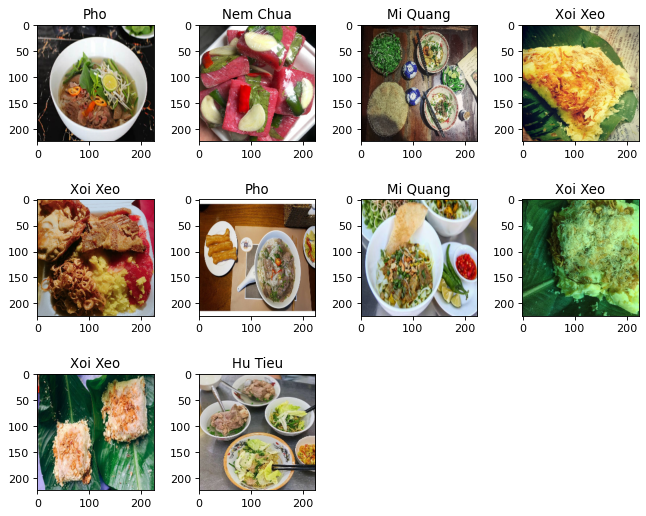

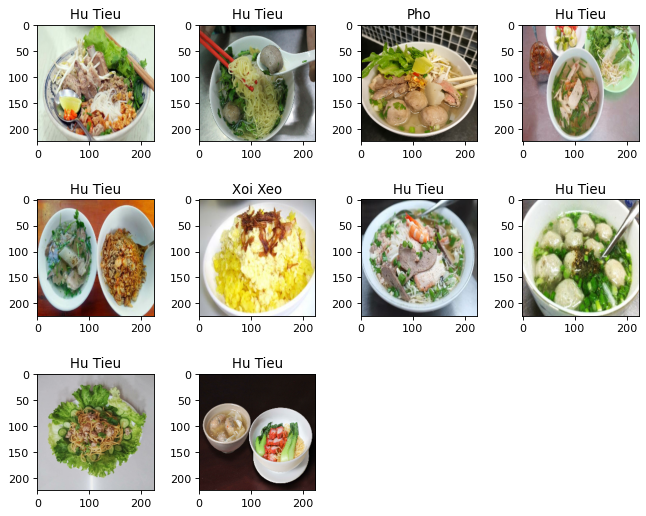

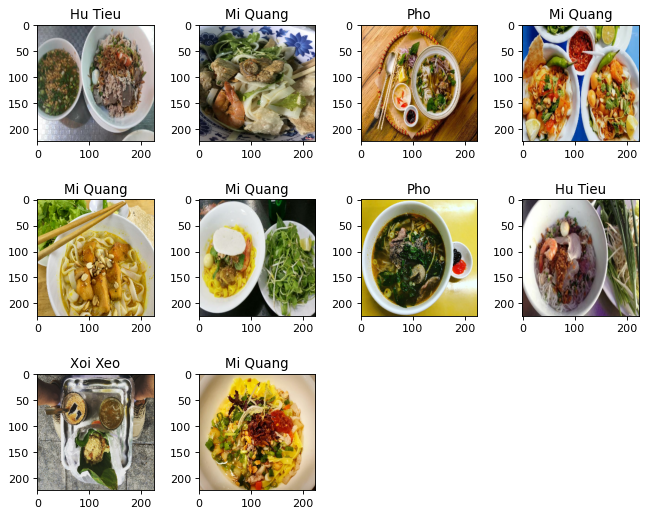

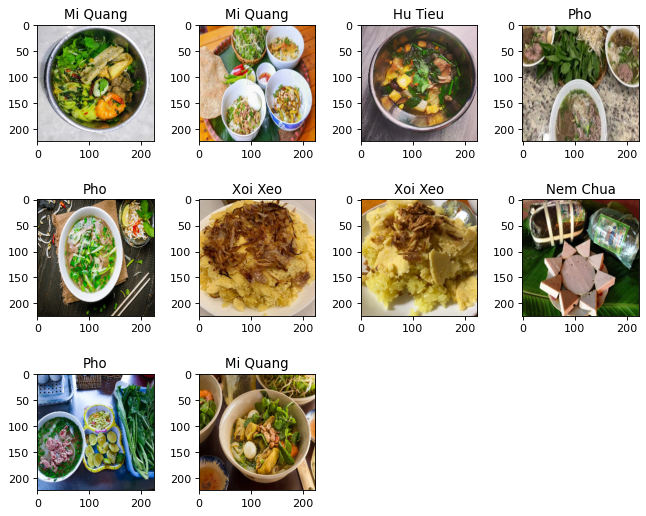

2024-04-08 17:07:50.662799: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


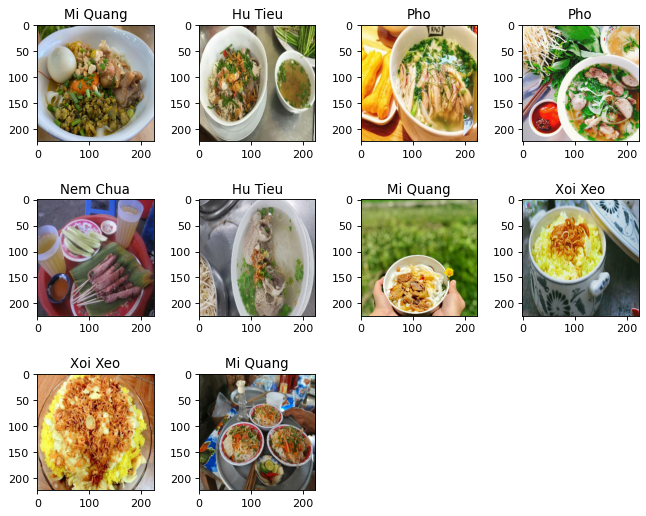

2024-04-08 17:07:51.178843: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [7]:
data_path = '/Users/kenny_jung/aiffel/data/model-fit/data/30vnfoods/TRAIN'
train_dataset = load_data(data_path, batch_size=10)
data_dir = pathlib.Path(data_path)
class_names = load_label(data_dir)

for img, label in train_dataset.take(5):
    show_batch(img, label, class_names)

# 4- Designing Model

In [13]:
# 문제2: 모델 구현하기

from tensorflow.keras.applications import EfficientNetB0

class Model(tf.keras.Model):
    '''
    EfficientNetB0을 백본으로 사용하는 모델을 구성합니다.
    Classification 문제로 접근할 것이기 때문에 맨 마지막 Dense 레이어에 
    우리가 원하는 클래스 개수만큼을 지정해주어야 합니다.
    '''
    def __init__(self, num_classes=5, freeze=False):
        super(Model, self).__init__()
        self.base_model = EfficientNetB0(include_top=False, weights='imagenet')
        if freeze:
            self.base_model.trainable = False
        self.top = tf.keras.Sequential([tf.keras.layers.GlobalAveragePooling2D(name="avg_pool"),
                                       tf.keras.layers.BatchNormalization(),
                                       tf.keras.layers.Dropout(0.5, name="top_dropout")])
        self.classifier = tf.keras.layers.Dense(num_classes, activation="softmax", name="pred")
    def call(self, inputs, training=True):
        x = self.base_model(inputs)
        x = self.top(x)
        x = self.classifier(x)
        return x

if __name__ == '__main__':
    model = Model(num_classes=5, freeze=True)
    model.build(input_shape=(None, 224, 224, 3))
    print(model.summary())

/Users/kenny_jung/anaconda3/lib/python3.11/site-packages/keras/src/layers/layer.py:357: UserWarning: `build()` was called on layer 'model_3', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ ?                      │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pred (Dense)                    │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

None


In [14]:
# import tensorflow as tf
# from tensorflow.keras.applications import EfficientNetB0

# class Model(tf.keras.Model):
#     def __init__(self, num_classes=5, freeze=False):
#         super(Model, self).__init__()
#         self.base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
#         if freeze:
#             self.base_model.trainable = False
#         self.top = tf.keras.Sequential([
#             tf.keras.layers.GlobalAveragePooling2D(name="avg_pool"),
#             tf.keras.layers.BatchNormalization(),
#             tf.keras.layers.Dropout(0.5, name="top_dropout")
#         ])
#         self.classifier = tf.keras.layers.Dense(num_classes, activation="softmax", name="pred")

#     def call(self, inputs, training=True):
#         x = self.base_model(inputs, training=False)  # Ensure base model is in inference mode
#         x = self.top(x)
#         return self.classifier(x)

# if __name__ == '__main__':
#     model = Model(num_classes=5, freeze=True)
#     # Use a dummy input to build the model
#     dummy_input = tf.zeros((1, 224, 224, 3))
#     model(dummy_input)
#     print(model.summary())

Model: "model_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ ?                      │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_6 (Sequential)       │ ?                      │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pred (Dense)                    │ ?                      │         6,405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,061,096 (15.49 MB)

 Trainable params: 8,965 (35.02 KB)

 Non-trainable params: 4,052,131 (15.46 MB)

None


# 4- Custom Trainer

In [14]:
# 문제3: custom trainer 구현하기

class Trainer:
    def __init__(self, model, epochs, batch, loss_fn, optimizer):
        self.model = model
        self.epochs = epochs
        self.batch = batch
        self.loss_fn = loss_fn
        self.optimizer = optimizer
    def train(self, train_dataset, train_metric):
        for epoch in range(self.epochs):
            print("\nStart of epoch %d" % (epoch+1,))
            # 매 batch 마다 반복적으로 학습
            for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
                with tf.GradientTape() as tape:
                    logits = model(x_batch_train, training=True)
                    loss_value = self.loss_fn(y_batch_train, logits)
                grads = tape.gradient(loss_value, model.trainable_weights)
                self.optimizer.apply_gradients(zip(grads, model.trainable_weights))
                # train metric 업데이트
                train_metric.update_state(y_batch_train, logits)
                # 5 배치마다 로깅
                if step % 5 == 0:
                    print(
                        "Training loss (for one batch) at step %d: %.4f"
                        % (step, float(loss_value))
                    )
                    print("Seen so far: %d samples" % ((step + 1) * self.batch))
                    print(train_metric.result().numpy())
                # 마지막 epoch 학습이 끝나면 train 결과를 보여줌
            train_acc = train_acc_metric.result()
            print("Training acc over epoch: %.4f" % (float(train_acc),))

# 5- Training

In [15]:
# 모델 학습 코드

train_path = "/Users/kenny_jung/aiffel/data/model-fit/data/30vnfoods/TRAIN"

epoch = 2
batch = 64

model = Model(num_classes=5)
dataset = load_data(data_path=train_path, batch_size=batch)
loss_function = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
train_acc_metric = tf.keras.metrics.CategoricalAccuracy()
trainer = Trainer(model=model,
                epochs=epoch,
                batch=batch,
                # ds_length=train_length,
                loss_fn=loss_function,
                optimizer=optimizer)

trainer.train(train_dataset=dataset,
            train_metric=train_acc_metric)


Start of epoch 1


Corrupt JPEG data: 9 extraneous bytes before marker 0xe2


Training loss (for one batch) at step 0: 3.0807
Seen so far: 64 samples
0.15625
Training loss (for one batch) at step 5: 1.8012
Seen so far: 384 samples
0.33333334
Training loss (for one batch) at step 10: 1.1165
Seen so far: 704 samples
0.46448863
Training loss (for one batch) at step 15: 0.6108
Seen so far: 1024 samples
0.5498047
Training loss (for one batch) at step 20: 1.1782
Seen so far: 1344 samples
0.6026786
Training loss (for one batch) at step 25: 1.0119
Seen so far: 1664 samples
0.63100964
Training loss (for one batch) at step 30: 0.6308
Seen so far: 1984 samples
0.6502016
Training loss (for one batch) at step 35: 0.7612
Seen so far: 2304 samples
0.67404515
Training loss (for one batch) at step 40: 0.5018
Seen so far: 2624 samples
0.6897347
Training acc over epoch: 0.6897

Start of epoch 2


2024-04-08 18:18:18.011747: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Training loss (for one batch) at step 0: 0.3556
Seen so far: 64 samples
0.6934334
Training loss (for one batch) at step 5: 0.2101
Seen so far: 384 samples
0.71390283
Training loss (for one batch) at step 10: 0.3763
Seen so far: 704 samples
0.73282903
Training loss (for one batch) at step 15: 0.2023
Seen so far: 1024 samples
0.74786204
Training loss (for one batch) at step 20: 0.3081
Seen so far: 1344 samples
0.76045626
Training loss (for one batch) at step 25: 0.2810
Seen so far: 1664 samples
0.7695193
Training loss (for one batch) at step 30: 0.2200
Seen so far: 1984 samples
0.7801527
Training loss (for one batch) at step 35: 0.1506
Seen so far: 2304 samples
0.7898063
Training loss (for one batch) at step 40: 0.2103
Seen so far: 2624 samples
0.7962322
Training acc over epoch: 0.7962


2024-04-08 18:21:34.250936: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


# 6- Test

In [16]:
# 모델 테스트 코드

test_ds = load_data(data_path=test_path)

for step_train, (x_batch_train, y_batch_train) in enumerate(test_ds.take(10)):
    prediction = model(x_batch_train)
    print("{}/{}".format(np.array(tf.equal(tf.argmax(y_batch_train, axis=1), tf.argmax(prediction, axis=1))).sum(), tf.argmax(y_batch_train, axis=1).shape[0]))

27/32
25/32
26/32
22/32
29/32
30/32
22/32
26/32
26/32
25/32


2024-04-08 18:22:05.794687: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


# 7- Retrospective

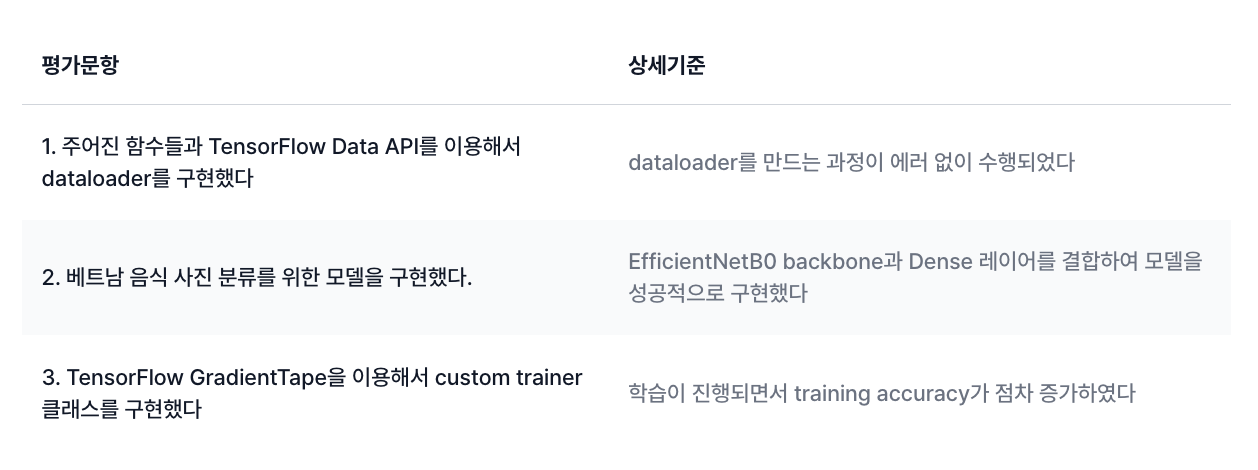

## 1. Dataloader via functions

1. process_path

2. prepare_for_training

3. load_data

4. load_label

5. show_batch

## 2. Model

## 3. Custom Trainer

1. Adjusted epoch and batch size with consideration computing resources

2. Limited num_classes to 5 for training time

3. Setup ds = ds.repeat(1) to stopping training process